In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

Q1

In [4]:
file_path = 'dataset.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset and its summary statistics
data_info = data.info()
data_head = data.head()
data_description = data.describe()

data_info, data_head, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7818 entries, 0 to 7817
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No.        7818 non-null   object 
 1   district   7818 non-null   object 
 2   Gini       7693 non-null   float64
 3   country    7818 non-null   object 
 4   state      7818 non-null   object 
 5   year       7818 non-null   int64  
 6   dyid       7818 non-null   object 
 7   potassium  4708 non-null   float64
 8   GDP        7798 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 549.8+ KB


(None,
   No.       district  Gini country                        state  year  \
 0   1  SOUTH ANDAMAN  0.33   INDIA  ANDAMAN AND NICOBAR ISLANDS  2000   
 1   1  SOUTH ANDAMAN  0.33   INDIA  ANDAMAN AND NICOBAR ISLANDS  2001   
 2   1  SOUTH ANDAMAN  0.33   INDIA  ANDAMAN AND NICOBAR ISLANDS  2002   
 3   1  SOUTH ANDAMAN  0.33   INDIA  ANDAMAN AND NICOBAR ISLANDS  2003   
 4   1  SOUTH ANDAMAN  0.33   INDIA  ANDAMAN AND NICOBAR ISLANDS  2004   
 
                 dyid  potassium          GDP  
 0  SOUTH ANDAMAN2000        NaN  1247.388396  
 1  SOUTH ANDAMAN2001        NaN  1275.670472  
 2  SOUTH ANDAMAN2002        NaN  1411.126730  
 3  SOUTH ANDAMAN2003        NaN  1559.979760  
 4  SOUTH ANDAMAN2004   1.742308  1619.520972  ,
               Gini         year    potassium           GDP
 count  7693.000000  7818.000000  4708.000000  7.798000e+03
 mean      0.266969  2008.966232    15.872150  3.296040e+05
 std       0.055361     5.474388    25.695746  2.769489e+05
 min       0.16000

In [5]:
cleaned_data = data.dropna(subset=['potassium', 'GDP', 'Gini'])

regression before scaling

In [6]:
y = cleaned_data['potassium']
X = cleaned_data['GDP']

# Add a constant term to include an intercept in the regression model
X = sm.add_constant(X)

# OLS regression model
model = sm.OLS(y, X)

#Fitting the model to the data
results = model.fit()

#results
print(results.summary())

mse = results.mse_resid
print("Mean Squared Error: ", mse)

# Alternatively, calculate MSE manually
predictions = results.predict(X)
mse_manual = ((predictions - y) ** 2).mean()
print("Manually Calculated Mean Squared Error: ", mse_manual)

                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.815
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0283
Time:                        00:19:46   Log-Likelihood:                -21479.
No. Observations:                4602   AIC:                         4.296e+04
Df Residuals:                    4600   BIC:                         4.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9359      0.596     28.392      0.0

In [7]:
scaled_data = cleaned_data
scaler = StandardScaler()
scaled_data[['GDP', 'Gini']] = scaler.fit_transform(cleaned_data[['GDP', 'Gini']])

C:\Users\komal\AppData\Local\Temp\ipykernel_19548\3184868003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data[['GDP', 'Gini']] = scaler.fit_transform(cleaned_data[['GDP', 'Gini']])


In [8]:
y = scaled_data['potassium']
X = scaled_data['GDP']

# Add a constant term to include an intercept in the regression model
X = sm.add_constant(X)

# OLS regression model
model = sm.OLS(y, X)

#Fitting the model to the data
results = model.fit()

#results
print(results.summary())

mse = results.mse_resid
print("Mean Squared Error: ", mse)

# Alternatively, calculate MSE manually
predictions = results.predict(X)
mse_manual = ((predictions - y) ** 2).mean()
print("Manually Calculated Mean Squared Error: ", mse_manual)

                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.815
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0283
Time:                        00:19:46   Log-Likelihood:                -21479.
No. Observations:                4602   AIC:                         4.296e+04
Df Residuals:                    4600   BIC:                         4.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9263      0.380     41.949      0.0

Q2

C:\Users\komal\AppData\Local\Temp\ipykernel_19548\736055291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['residuals'] = results.resid


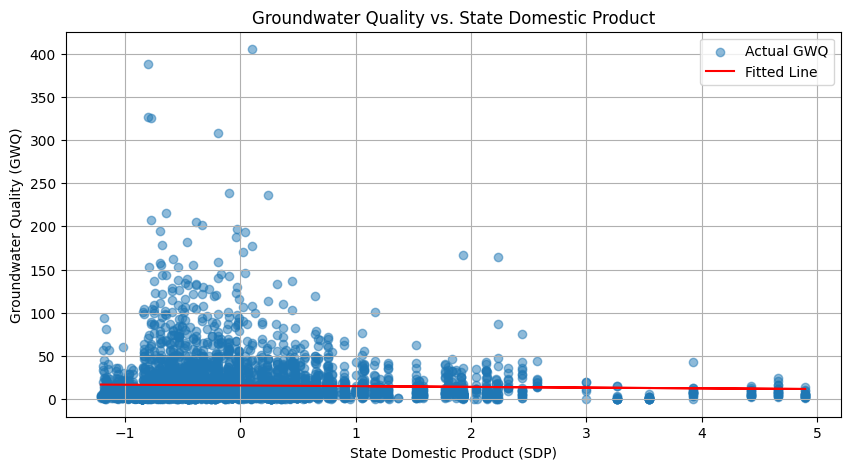

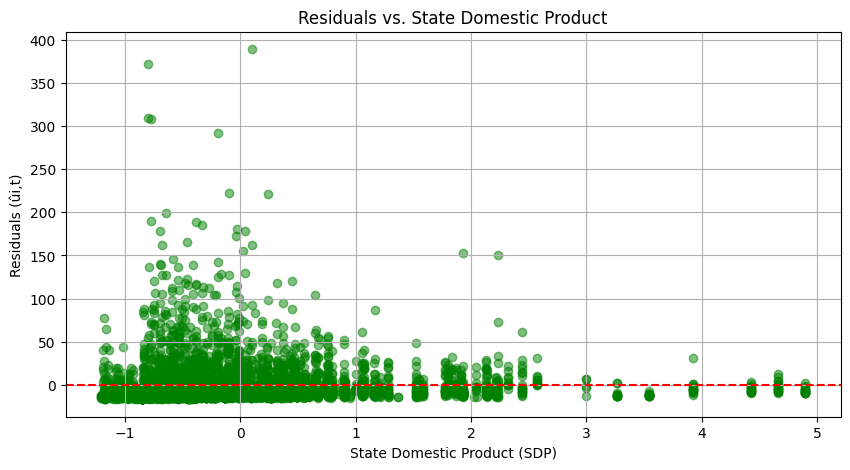

In [9]:
# Calculate the residuals
cleaned_data['residuals'] = results.resid

# Plot 1: GWQ vs SDP with the regression line
plt.figure(figsize=(10, 5))
plt.scatter(cleaned_data['GDP'], cleaned_data['potassium'], alpha=0.5, label='Actual GWQ')
plt.plot(cleaned_data['GDP'], results.fittedvalues, color='red', label='Fitted Line')
plt.title('Groundwater Quality vs. State Domestic Product')
plt.xlabel('State Domestic Product (SDP)')
plt.ylabel('Groundwater Quality (GWQ)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Residuals vs SDP
plt.figure(figsize=(10, 5))
plt.scatter(cleaned_data['GDP'], cleaned_data['residuals'], alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. State Domestic Product')
plt.xlabel('State Domestic Product (SDP)')
plt.ylabel('Residuals (ûi,t)')
plt.grid(True)
plt.show()


Q3

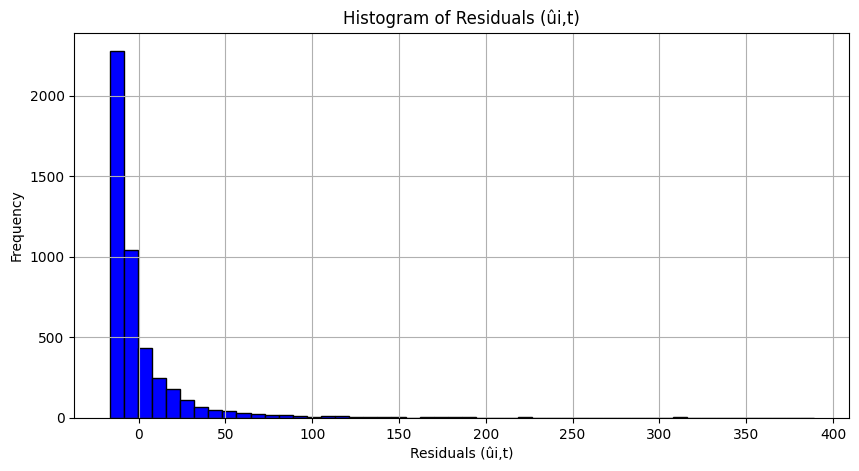

6.775735528208315e-11

In [10]:
# Plotting the histogram of the residuals
plt.figure(figsize=(10, 5))
plt.hist(cleaned_data['residuals'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Residuals (ûi,t)')
plt.xlabel('Residuals (ûi,t)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Verification that the sum of the residuals is approximately 0
sum_of_residuals = cleaned_data['residuals'].sum()
sum_of_residuals

Q4

Setting up model (also using standard scaler to remove multicollinearity)

In [26]:
def runner(data):
    data_clean = data.dropna(subset=['potassium','GDP','Gini'])
    #imputer = SimpleImputer(strategy='median')
    #data_clean[['GDP', 'Gini']] = imputer.fit_transform(data_clean[['GDP', 'Gini']])

    # Create polynomial features for GDP
    poly = PolynomialFeatures(degree=3, include_bias=False)
    gdp_poly = poly.fit_transform(data_clean[['GDP']])
    gdp_poly_df = pd.DataFrame(gdp_poly, columns=['GDP', 'GDP2', 'GDP3'], index=data_clean.index)

    # Merge polynomial GDP features back into the original dataframe
    data_clean = pd.concat([data_clean, gdp_poly_df[['GDP2', 'GDP3']]], axis=1)

    # Normalize 'GDP', 'Gini', 'potassium', 'GDP2', 'GDP3'
    scaler = StandardScaler()
    data_clean[['GDP', 'Gini', 'potassium', 'GDP2', 'GDP3']] = scaler.fit_transform(data_clean[['GDP', 'Gini', 'potassium', 'GDP2', 'GDP3']])

    # Check for outliers by looking at statistical descriptions
    data_clean_description = data_clean[['GDP', 'Gini', 'potassium', 'GDP2', 'GDP3']].describe()

    data_clean_description

    X = data_clean[['GDP', 'GDP2', 'GDP3', 'Gini']]
    X = sm.add_constant(X)

    # Define the dependent variable
    y = data_clean['potassium']

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Get the summary of the regression model
    model_summary = model.summary()
    print(model_summary)

In [27]:
runner(cleaned_data)


                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     14.52
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           8.73e-12
Time:                        00:20:49   Log-Likelihood:                -6501.1
No. Observations:                4602   AIC:                         1.301e+04
Df Residuals:                    4597   BIC:                         1.304e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.137e-17      0.015  -7.76e-16      1.0

Removing outliers (not of result, of potassium, gdp, gini); part of preprocessing not part of this ques

In [30]:
# Calculating IQR for potassium, GDP, and Gini
Q1 = data[['potassium', 'GDP', 'Gini']].quantile(0.25)
Q3 = data[['potassium', 'GDP', 'Gini']].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((data[['potassium', 'GDP', 'Gini']] < (Q1 - 1.5 * IQR)) | (data[['potassium', 'GDP', 'Gini']] > (Q3 + 1.5 * IQR)))

# Filtering out the outliers
data_clean = data[~(outliers.any(axis=1))]

# Comparing the original and cleaned datasets
original_shape = data.shape
cleaned_shape = data_clean.shape

original_shape, cleaned_shape


((752, 9), (700, 9))

In [14]:
runner(data_clean)

                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     13.63
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           4.88e-11
Time:                        00:19:47   Log-Likelihood:                -5373.4
No. Observations:                3806   AIC:                         1.076e+04
Df Residuals:                    3801   BIC:                         1.079e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.495e-17      0.016  -4.65e-15      1.0

Negligble difference, major difference from scaling

Q5

Write inferences from Q4 regression table results. No coding component in this 

(Using the data which did not have outliers removed)

Q6

In [15]:
# Create subsets of the data based on different time periods
data_2000_2004 = data[(data['year'] >= 2000) & (data['year'] <= 2004)]
data_2005_2009 = data[(data['year'] >= 2005) & (data['year'] <= 2009)]
data_2010_2014 = data[(data['year'] >= 2010) & (data['year'] <= 2014)]
data_2015_2018 = data[(data['year'] >= 2015) & (data['year'] <= 2018)]

# Check the size of each subset to confirm correct division
(data_2000_2004.shape, data_2005_2009.shape, data_2010_2014.shape, data_2015_2018.shape)


((2070, 9), (2070, 9), (2046, 9), (1632, 9))

In [16]:
runner(data_2000_2004)

                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.823
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           0.000748
Time:                        00:19:47   Log-Likelihood:                -1276.0
No. Observations:                 906   AIC:                             2562.
Df Residuals:                     901   BIC:                             2586.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.326e-17      0.033  -1.31e-15      1.0

In [17]:
runner(data_2005_2009)

                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     17.20
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           9.45e-14
Time:                        00:19:47   Log-Likelihood:                -1768.4
No. Observations:                1270   AIC:                             3547.
Df Residuals:                    1265   BIC:                             3573.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.681e-17      0.027   6.14e-16      1.0

In [18]:
runner(data_2010_2014)

                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     11.59
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.01e-09
Time:                        00:19:47   Log-Likelihood:                -1799.1
No. Observations:                1284   AIC:                             3608.
Df Residuals:                    1279   BIC:                             3634.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e-17      0.027   3.28e-15      1.0

In [19]:
runner(data_2015_2018)

                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.141
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           0.000417
Time:                        00:19:47   Log-Likelihood:                -1610.2
No. Observations:                1142   AIC:                             3230.
Df Residuals:                    1137   BIC:                             3256.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.709e-17      0.029    3.3e-15      1.0

Q7

In [20]:
data = pd.read_excel('ECO/CENTRAL_REGION.xlsx')
runner(data)



                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5693
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.685
Time:                        00:19:48   Log-Likelihood:                -1738.5
No. Observations:                1226   AIC:                             3487.
Df Residuals:                    1221   BIC:                             3513.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.933e-17      0.029   2.43e-15      1.0

In [21]:
data = pd.read_excel('ECO/EASTERN_REGION.xlsx')
runner(data)



                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     12.12
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.56e-09
Time:                        00:19:48   Log-Likelihood:                -976.74
No. Observations:                 705   AIC:                             1963.
Df Residuals:                     700   BIC:                             1986.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.778e-17      0.037   1.31e-15      1.0

In [22]:
data = pd.read_excel('ECO/NORTH-EASTERN_REGION.xlsx')
runner(data)



                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     14.09
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.63e-10
Time:                        00:19:48   Log-Likelihood:                -310.52
No. Observations:                 237   AIC:                             631.0
Df Residuals:                     232   BIC:                             648.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.274e-16      0.059   2.16e-15      1.0

In [23]:
data = pd.read_excel('ECO/NORTHERN_REGION.xlsx')
runner(data)



                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     16.88
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.68e-13
Time:                        00:19:49   Log-Likelihood:                -1808.7
No. Observations:                1298   AIC:                             3627.
Df Residuals:                    1293   BIC:                             3653.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.126e-17      0.027  -2.26e-15      1.0

In [24]:
data = pd.read_excel('ECO/SOUTHERN_REGION.xlsx')
runner(data)



                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.920
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           0.000678
Time:                        00:19:49   Log-Likelihood:                -681.28
No. Observations:                 487   AIC:                             1373.
Df Residuals:                     482   BIC:                             1394.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.392e-17      0.045  -1.66e-15      1.0

In [25]:
data = pd.read_excel('ECO/WESTERN_REGION.xlsx')
runner(data)



                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     7.024
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.59e-05
Time:                        00:19:49   Log-Likelihood:                -813.41
No. Observations:                 583   AIC:                             1637.
Df Residuals:                     578   BIC:                             1659.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.34e-16      0.041   -3.3e-15      1.0